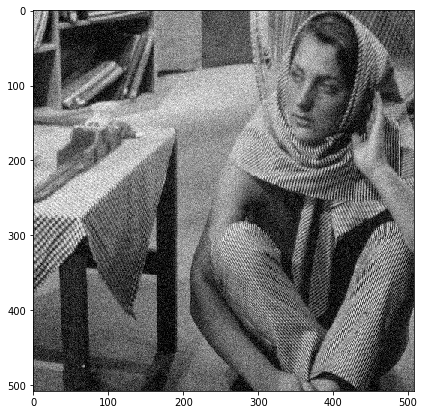

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
from scipy.signal import convolve2d
from math import *
import time
%matplotlib inline


plt.rcParams['figure.figsize'] = [7, 7]

def load_image(filename):
    img = np.asarray(Image.open(filename))
    img = img.astype("float32") / 255.
    return img

def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

def show_image(img):
    if len(img.shape) == 2:
        img = gray2rgb(img)
    plt.imshow(img, interpolation='nearest')

# load the image
im = load_image('noisy_image.jpg')
im = im.mean(axis=2) # convert to grayscale
show_image(im)

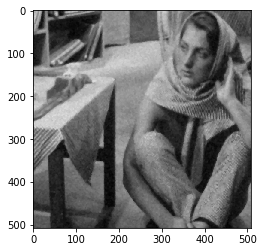

In [2]:
im_pad = np.pad(im, 5, mode='constant')  # pad the border of the original image
im_out = np.zeros_like(im)  # initialize the output image array
''' TODO: Implement a mean filter using "for" loop here (modify the im_out matrix). '''
# assume the kernel size as 5*5
row_count, column_count = np.shape(im_pad)

im_temp = np.zeros_like(im_pad)

for i in range(2, row_count-2):
    for j in range(2, column_count-2):
        median_kernel = im_pad[i-2:i+3,j-2:j+3]
        im_temp[i,j] = np.median(median_kernel)
im_out = im_temp[5:row_count-5,5:column_count-5]
show_image(im_out)



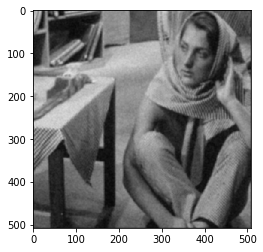

In [9]:
im_pad = np.pad(im, 5, mode='constant')  # pad the border of the original image
im_out = np.zeros_like(im)  # initialize the output image array
''' TODO: Implement a mean filter using "for" loop here (modify the im_out matrix). '''
# assume the kernel size as 5*5
row_count, column_count = np.shape(im_pad)

im_temp = np.zeros_like(im_pad)

for i in range(2, row_count-2):
    for j in range(2, column_count-2):
        mean_kernel_res = im_pad[i-2:i+3,j-2:j+3]
        im_temp[i,j] = np.mean(mean_kernel_res)
        
im_out = im_temp[5:row_count-5,5:column_count-5]
show_image(im_out)


In [10]:
im_out[:5,:5]

array([[0.24705882, 0.3350588 , 0.42180392, 0.43419608, 0.4404706 ],
       [0.32611766, 0.44015682, 0.55403924, 0.5604706 , 0.5697255 ],
       [0.40439215, 0.5381961 , 0.6787451 , 0.6939608 , 0.7052549 ],
       [0.4084706 , 0.5466667 , 0.6890981 , 0.6958431 , 0.70572555],
       [0.41960782, 0.5546667 , 0.69615686, 0.6958432 , 0.702902  ]],
      dtype=float32)

In [11]:
test_c = convolve_image2(im, mean_filt)
print(np.shape(test_c))
test_c[5:10,5:10]




NameError: name 'convolve_image2' is not defined

In [6]:
def convolve_image(image, filter_matrix):
    ''' Convolve a 2D image using the filter matrix.
    Args:
        image: a 2D numpy array.
        filter_matrix: a 2D numpy array.
    Returns:
        the convolved image, which is a 2D numpy array same size as the input image.
        
    TODO: Implement the convolve_image function here. 
    '''
    #assume the size of width is odd
    width, height = np.shape(filter_matrix)
    padding_size = floor(width/2)
    im_pad = np.pad(im, padding_size, mode='constant')  # pad the border of the original image
    row_count, column_count = np.shape(im_pad)
    im_out = np.zeros_like(im)  # initialize the output image array
    im_temp = np.zeros_like(im_pad)
    
    for i in range(padding_size, row_count-padding_size):
        for j in range(padding_size, row_count-padding_size):
            #crop the region applied to convolution with filter_matrix
            image_temp = im_pad[i-padding_size:i-padding_size+width,j-padding_size:j-padding_size+height]
            # pratical calculation 
            im_temp[i,j] = np.sum(image_temp * filter_matrix)
    
    im_out = im_temp[padding_size:row_count-padding_size,padding_size:column_count-padding_size]
    return im_out        
        

In [7]:
mean_filt = None 
''' TODO: Create a mean filter matrix here. '''
#assume the filter size: 5*5
mean_filt = np.ones((5,5)) / 25.0

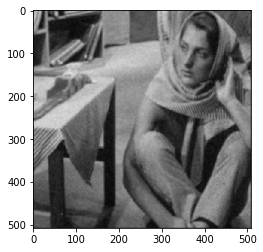

In [8]:
show_image(convolve_image(im, mean_filt))

In [12]:
# flip

def convolve_image2(image, filter_matrix):
    ''' Convolve a 2D image using the filter matrix.
    Args:
        image: a 2D numpy array.
        filter_matrix: a 2D numpy array.
    Returns:
        the convolved image, which is a 2D numpy array same size as the input image.
        
    TODO: Implement the convolve_image function here. 
    '''
    #assume the size of width is odd
    filter_matrix = np.flipud(filter_matrix)
    filter_matrix = np.fliplr(filter_matrix)
    
    
    width, height = np.shape(filter_matrix)
    padding_size = floor(width/2)
    im_pad = np.pad(im, padding_size, mode='constant')  # pad the border of the original image
    row_count, column_count = np.shape(im_pad)
    im_out = np.zeros_like(im)  # initialize the output image array
    im_temp = np.zeros_like(im_pad)
    
    for i in range(padding_size, row_count-padding_size):
        for j in range(padding_size, row_count-padding_size):
            #crop the region applied to convolution with filter_matrix
            image_temp = im_pad[i-padding_size:i-padding_size+width,j-padding_size:j-padding_size+height]
            # pratical calculation 
            im_temp[i,j] = np.sum(image_temp * filter_matrix)
    
    im_out = im_temp[padding_size:row_count-padding_size,padding_size:column_count-padding_size]
    return im_out        

In [13]:
test_c = convolve_image2(im, mean_filt)
print(np.shape(test_c))
test_c[5:10,5:10]

(508, 508)


array([[0.70949024, 0.7308235 , 0.7364706 , 0.71811765, 0.6745098 ],
       [0.70964706, 0.7355294 , 0.73474514, 0.7055687 , 0.6519216 ],
       [0.72141176, 0.7375687 , 0.73035294, 0.6967843 , 0.6349804 ],
       [0.7168628 , 0.73207843, 0.7328628 , 0.6906667 , 0.6244706 ],
       [0.7135686 , 0.7247059 , 0.71686274, 0.6698039 , 0.60282356]],
      dtype=float32)

In [14]:
test_c2 = convolve2d(im, mean_filt)
print(np.shape(test_c2))
test_c2[5:10,5:10]


(512, 512)


array([[0.69584316, 0.70572551, 0.70023532, 0.72000002, 0.73364708],
       [0.69584316, 0.70290198, 0.70305885, 0.72454904, 0.74337258],
       [0.69741178, 0.70290198, 0.70949022, 0.73082355, 0.73647061],
       [0.70886276, 0.70823532, 0.70964709, 0.73552944, 0.73474512],
       [0.71560786, 0.71105884, 0.72141179, 0.73756865, 0.73035296]])

In [15]:
test_c3 = convolve_image(im, mean_filt)
print(np.shape(test_c3))
test_c3[5:10,5:10]


(508, 508)


array([[0.70949024, 0.7308235 , 0.7364706 , 0.71811765, 0.6745098 ],
       [0.70964706, 0.7355294 , 0.73474514, 0.7055687 , 0.6519216 ],
       [0.72141176, 0.7375687 , 0.73035294, 0.6967843 , 0.6349804 ],
       [0.7168628 , 0.73207843, 0.7328628 , 0.6906667 , 0.6244706 ],
       [0.7135686 , 0.7247059 , 0.71686274, 0.6698039 , 0.60282356]],
      dtype=float32)

In [18]:
361/2

180.5

In [22]:
test = np.zeros((361,361))

In [20]:
test[2:4,2:4] = 1

In [21]:
test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
np.shape(test)

(361, 361)

In [27]:
a = np.ones((5,5))

In [28]:
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [29]:
b = np.ones((5,5))*5

In [30]:
b

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

In [31]:
a * b

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])